In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3593480383974045428, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9214062756
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3026034058643545384
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [3]:
import os
import numpy as np
np.random.seed(777)

from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.backend as K

from keras.utils import plot_model

from keras.optimizers import SGD, Adam, RMSprop

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
import keras
import tensorflow as tf

print("Keras Version", keras.__version__)
print("tensorflow Version", tf.__version__)
print("dim_ordering:", K.image_dim_ordering())

Keras Version 2.2.4
tensorflow Version 1.9.0
dim_ordering: tf


In [5]:
output_classes = 2
batch_size = 8
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)
epochs = 50

nb_train_samples = 59168
nb_validation_samples = 18384
nb_test_samples = 967

In [6]:
train_dir = 'data/train/'
validation_dir = 'data/validation'
test_dir = 'data/test'

In [7]:
random_seed = np.random.seed(1142)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 59168 images belonging to 2 classes.
Found 18384 images belonging to 2 classes.
Found 967 images belonging to 2 classes.


In [8]:
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)
sgd_opt = SGD(lr=1e-06, momentum=0.0, decay=0.0, nesterov=False)
rmsp_opt = RMSprop(lr=1e-4, decay=0.9)

In [13]:
# for i, layer in enumerate(NasNetLarge_model.layers):
#     print(i, layer.name)

In [12]:
NasNetLarge_model = load_model('models/5.NASNetLarge-new-ISBI19-Model.h5', compile=False)
NasNetLarge_model = Model(inputs= NasNetLarge_model.input,outputs = NasNetLarge_model.get_layer('dense_3').output, name='NasNetLarge_model')

In [ ]:
# InceptionResNetV2_model = load_model('models/5.InceptionResNetV2-ISBI19-Model.h5')
# InceptionResNetV2_model = Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('dense_2').output,name='InceptionResNetV2_model')

In [ ]:
# DenseNet201_model = load_model('models/12.DenseNet201-ISIB19-DataSet-Model.h5')
# DenseNet201_model = Model(inputs=DenseNet201_model.input, outputs=DenseNet201_model.get_layer('dense_3').output, name='DenseNet201_model')

In [ ]:
# InceptionV3_model = load_model('models/9.InceptionV3-ISIB19-DataSet-Model.h5')
# InceptionV3_model = Model(inputs = InceptionV3_model.input,outputs = InceptionV3_model.get_layer('dense_3').output, name='InceptionV3_model')

In [15]:
VGG19_model = load_model('models/11.VGG19-ISBI19-Model.h5')
VGG19_model = Model(inputs = VGG19_model.input,outputs = VGG19_model.get_layer('dense_3').output, name='VGG19_model')

In [16]:
img = Input(shape=(224, 224,3),name='img')

feature1=NasNetLarge_model(img)
# feature2=InceptionV3_model(img)

# for layer in InceptionV3_model.layers[:300]:  
#     layer.trainable = False 
# for layer in InceptionV3_model.layers[300:]:  
#     layer.trainable = True  

feature3=VGG19_model(img)
# for layer in VGG19_model.layers[:170]:  
#     layer.trainable = False 
# for layer in VGG19_model.layers[170:]:  
#     layer.trainable = True  

# x = concatenate([feature1,feature2,feature3])
x = concatenate([feature1,feature3])

x = Dropout(0.5)(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.25)(x)
output = Dense(2, activation='softmax', name='output')(x)

model=Model(inputs=img,outputs=output)

In [17]:
# pip install graphviz
# plot_model(model=model,to_file='ensemble.jpg')

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=adam_opt, metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    workers=8)

# with open('ensemble2_history.txt','w') as f:
#     f.write(str(history.history))

Epoch 1/50
7396/7396 [==============================] - 5113s 691ms/step - loss: 0.5566 - acc: 0.7804 - val_loss: 0.3993 - val_acc: 0.8784
Epoch 2/50
7396/7396 [==============================] - 5008s 677ms/step - loss: 0.4099 - acc: 0.8579 - val_loss: 0.3129 - val_acc: 0.9061
Epoch 3/50
7396/7396 [==============================] - 4986s 674ms/step - loss: 0.3583 - acc: 0.8658 - val_loss: 0.2616 - val_acc: 0.9352
Epoch 4/50
7396/7396 [==============================] - 5041s 682ms/step - loss: 0.3275 - acc: 0.8737 - val_loss: 0.2652 - val_acc: 0.9281
Epoch 5/50
7396/7396 [==============================] - 5014s 678ms/step - loss: 0.3137 - acc: 0.8779 - val_loss: 0.3160 - val_acc: 0.9115
Epoch 6/50
7396/7396 [==============================] - 5044s 682ms/step - loss: 0.2808 - acc: 0.8921 - val_loss: 0.1881 - val_acc: 0.9425
Epoch 7/50
7396/7396 [==============================] - 5045s 682ms/step - loss: 0.2612 - acc: 0.8966 - val_loss: 0.1783 - val_acc: 0.9489
Epoch 8/50
7396/7396 [=====

In [19]:
model.save('models/24.Ensemble8-ISBI19-Model.h5')
model.save_weights('models/24.Ensemble8-ISBI19-Weights.h5')

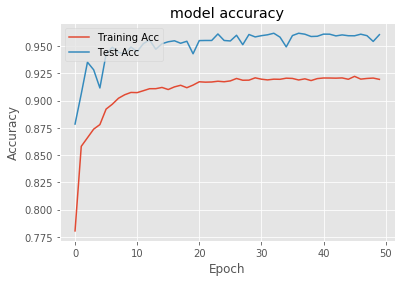

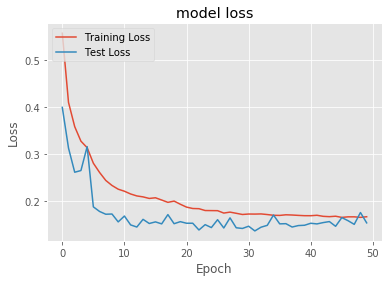

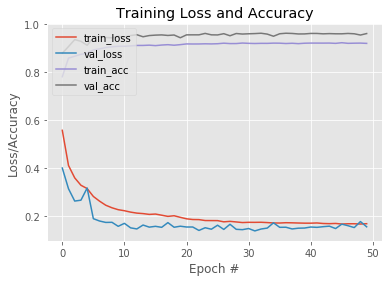

In [20]:
plt.style.use("ggplot")

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Test Acc'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'], loc='upper left')
plt.show()

plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [21]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

Validation Score:  0.07919239334762096
Validation Accuracy:  0.98


In [22]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

121/120 [==============================] - 35s 293ms/step
No of errors = 36/967


Confusion Matrix
[[646   9]
 [ 27 285]]


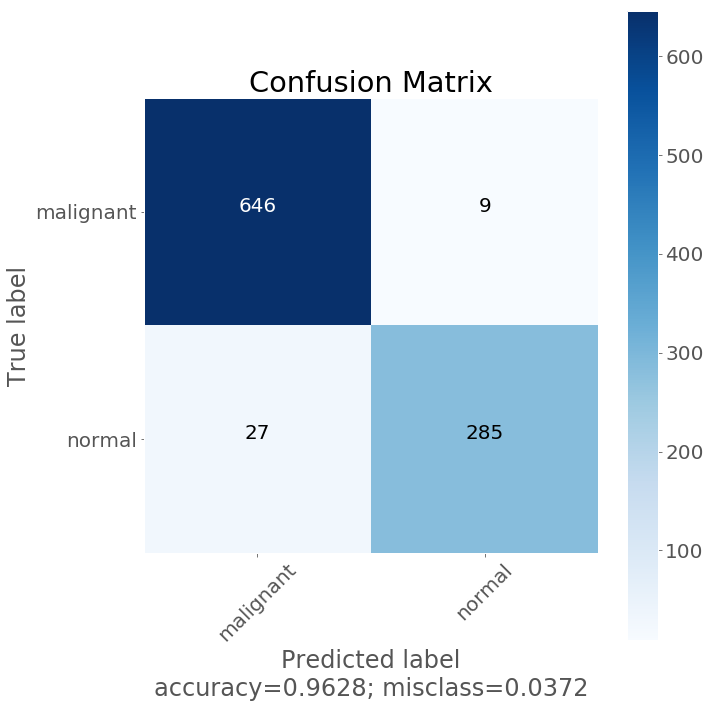

In [23]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#     plt.savefig('plots/17.Ensemble-Models1-CM.png', bbox_inches='tight', dpi = 100) 


plt.figure(figsize=(10,10))


plot_confusion_matrix(cm, classes=labels,title='Confusion Matrix')

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred = predicts
y_pred_probabilities=y_pred

y_pred = np.argmax(y_pred,axis = 1) 
y_actual = test_generator.classes

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

confusion_mtx = confusion_matrix(y_actual, y_pred) 
print(confusion_mtx)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

[[646   9]
 [ 27 285]]
              precision    recall  f1-score   support

      normal       0.96      0.99      0.97       655
   malignant       0.97      0.91      0.94       312

   micro avg       0.96      0.96      0.96       967
   macro avg       0.96      0.95      0.96       967
weighted avg       0.96      0.96      0.96       967



In [25]:
total=sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1]) / total
print ('Accuracy : ', accuracy*100)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

Accuracy :  96.27714581178904
Sensitivity :  95.98811292719168
Specificity :  96.93877551020408


In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

th = 0.3

acc = accuracy_score(truth,predict_class > th)
prec = precision_score(truth,predict_class > th)
f1 = f1_score(truth,predict_class > th)
recall = recall_score(truth,predict_class > th)

print('Accuracy:  {:.4f}'.format(acc*100))
print('Precision: {:.4f}'.format(prec*100))
print('Recall:    {:.4f}'.format(recall*100))
print('F1:        {:.4f}'.format(f1*100))

Accuracy:  96.2771
Precision: 96.9388
Recall:    91.3462
F1:        94.0594


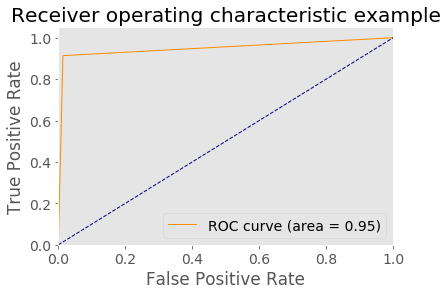

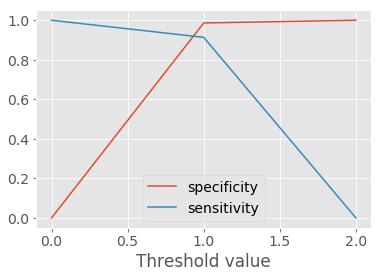

In [27]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 14})

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_generator.classes, predict_class)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
lw = 1
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#plotting sensitivity and specificity
plt.figure()
plt.plot(thresholds, 1-fpr, label = 'specificity')
plt.plot(thresholds, tpr, label = 'sensitivity')
plt.legend()
plt.grid()
plt.xlabel('Threshold value')
plt.show()